In [1]:
import sys
import os

sys.path.append("needed_modules/")


import relaxations as rt
import timescales as ts
import manage_files as mf
#import plotting as pt
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

#Load experimental data
experiments = np.loadtxt("Relaxation_exp.txt",comments=["#"])

#Set needed constants and Magnetic Field
gammaD=41.695*10**6; #r*s^(-1)*T^(-1)
gammaH=267.513*10**6;
gammaC=67.262*10**6;
gammaN=-27.166*10**6;

magnetic_field = 850*(2*np.pi/gammaH*10**6)

In [ ]:
output_path_relax="relaxations/"            # folder to save spin relaxation times yaml files, 
                                      # defined above or redefine here 
output_path_timescales="timescales/"  # folder to save timescale yaml files
                                      # defined above or redefine here

relaxation_yamls,timescales_yamls=mf.load_yaml_files(output_path_relax,output_path_timescales)

Spin relaxation data exist for:



In [83]:
def read_corr_func(correlation_file):
    # for reading the correlation function data
    opf = open(correlation_file, 'r')
    lines = opf.readlines()
    data_times = []
    data_F = []
    for i,line in enumerate(lines):
        if '#' in line:
            continue
        if '&' in line:
            continue
        if '@' in line:
            continue    
        if 'label' in line:
            continue
        if line == "":
            continue
        parts = line.split()
        if np.shape(parts)[0]==2:
            try:
                data_F.append(float(parts[1]))
                data_times.append(float(parts[0]))
            except:
                print(i)
                break
   
    data_Fout = np.array(data_F)
    times_out = np.array(data_times)
    return data_Fout, times_out


def plot_SRT_convergence_for_system(system):
    fig = plt.figure(figsize=(15,15))
    ax={}



    outer = gridspec.GridSpec(7,3,hspace=0.4)
    for i in range(21):
        inner = gridspec.GridSpecFromSubplotSpec(1,4,subplot_spec=outer[i],wspace=0.1)
        for j in range(4):
            ax[i,j] = plt.Subplot(fig, inner[j])
            fig.add_subplot(ax[i,j])
            ax[i,j].yaxis.set_tick_params(labelsize=5)
            ax[i,j].xaxis.set_tick_params(labelsize=8)

        """
        Plot rectangelas for experimental ranges, 
        independent od residues, 
        shows min to max values of T1, T2, hetNOE
        """

        T1rec = patches.Rectangle((0, min(experiments[:,1])), 220, (max(experiments[:,1])-min(experiments[:,1])), linewidth=1, edgecolor='r', facecolor='black',alpha=0.1)
        ax[i,0].add_patch(T1rec)
        #ax[i,0].plot(0, min(experiments[:,1]),'.')

        T2rec = patches.Rectangle((0, min(experiments[:,3]/1000)), 220, (max(experiments[:,3]/1000)-min(experiments[:,3]/1000)), linewidth=1, edgecolor='r', facecolor='black',alpha=0.1)
        ax[i,1].add_patch(T2rec)


        NOErec = patches.Rectangle((0, min(experiments[:,5])), 220, (max(experiments[:,5])-min(experiments[:,5])), linewidth=1, edgecolor='r', facecolor='black',alpha=0.1)
        ax[i,2].add_patch(NOErec)



    corr_parts=[]
    T1s = []
    T2s = []
    NOEs = []
    for analysis in timescales_yamls[system]:
        part = timescales_yamls[system][analysis]["info"]['06_analyze']
        Ctimes = timescales_yamls[system][analysis]["results"]["timescales"][0]
        for i in range(1,len(timescales_yamls[system][analysis]["results"]["timescales"])):
            Coeffs = timescales_yamls[system][analysis]["results"]["timescales"][i]
            T1, T2, NOE = rt.get_relaxation_N(magnetic_field,Coeffs,Ctimes,OP=0)
            colour = "blue"
            if Coeffs[-1]!=0:
                colour = "red"
                scale=1-Coeffs[-1]
                Coeffs[-1]=0
                Coeffs=np.array(Coeffs)/scale
                T1w, T2w, NOEw = rt.get_relaxation_N(magnetic_field,Coeffs,Ctimes,OP=0)
                ax[i-1,0].plot(part,T1w,".",c="g")
                ax[i-1,1].plot(part,T2w,".",c="g")
                ax[i-1,2].plot(part,NOEw,".",c="g")
            ax[i-1,0].plot(part,T1,".",c=colour)
            ax[i-1,1].plot(part,T2,".",c=colour)
            ax[i-1,2].plot(part,NOE,".",c=colour)

            ax[i-1,1].set_title(f"Residue {i+1}",size=8)
            
    plt.suptitle(system,x=0.5,y=0.92)
    plt.savefig(f"results/01_SRT_vs_corr_func_length_corr//{system}.pdf",bbox_inches='tight')
    
def plot_SRT_convergence_for_system_corr_f(system):
    fig = plt.figure(figsize=(15,15))
    ax={}



    outer = gridspec.GridSpec(7,3,hspace=0.4)
    for i in range(21):
        inner = gridspec.GridSpecFromSubplotSpec(1,4,subplot_spec=outer[i],wspace=0.1)
        for j in range(4):
            ax[i,j] = plt.Subplot(fig, inner[j])
            fig.add_subplot(ax[i,j])
            ax[i,j].yaxis.set_tick_params(labelsize=5)
            ax[i,j].xaxis.set_tick_params(labelsize=8)

        """
        Plot rectangelas for experimental ranges, 
        independent od residues, 
        shows min to max values of T1, T2, hetNOE
        """

        T1rec = patches.Rectangle((0, min(experiments[:,1])), 220, (max(experiments[:,1])-min(experiments[:,1])), linewidth=1, edgecolor='r', facecolor='black',alpha=0.1)
        ax[i,0].add_patch(T1rec)
        #ax[i,0].plot(0, min(experiments[:,1]),'.')

        T2rec = patches.Rectangle((0, min(experiments[:,3]/1000)), 220, (max(experiments[:,3]/1000)-min(experiments[:,3]/1000)), linewidth=1, edgecolor='r', facecolor='black',alpha=0.1)
        ax[i,1].add_patch(T2rec)


        NOErec = patches.Rectangle((0, min(experiments[:,5])), 220, (max(experiments[:,5])-min(experiments[:,5])), linewidth=1, edgecolor='r', facecolor='black',alpha=0.1)
        ax[i,2].add_patch(NOErec)



    corr_parts=[]
    T1s = []
    T2s = []
    NOEs = []
    for analysis in timescales_yamls[system]:
        part = timescales_yamls[system][analysis]["info"]['06_analyze']
        Ctimes = timescales_yamls[system][analysis]["results"]["timescales"][0]
        for i in range(1,len(timescales_yamls[system][analysis]["results"]["timescales"])):
            Coeffs = timescales_yamls[system][analysis]["results"]["timescales"][i]
            T1, T2, NOE = rt.get_relaxation_N(magnetic_field,Coeffs,Ctimes,OP=0)
            colour = "blue"
            if Coeffs[-1]!=0:
                colour = "red"
                scale=1-Coeffs[-1]
                Coeffs[-1]=0
                Coeffs=np.array(Coeffs)/scale
                T1w, T2w, NOEw = rt.get_relaxation_N(magnetic_field,Coeffs,Ctimes,OP=0)
                ax[i-1,0].plot(part,T1w,".",c="g")
                ax[i-1,1].plot(part,T2w,".",c="g")
                ax[i-1,2].plot(part,NOEw,".",c="g")
            ax[i-1,0].plot(part,T1,".",c=colour)
            ax[i-1,1].plot(part,T2,".",c=colour)
            ax[i-1,2].plot(part,NOE,".",c=colour)

            ax[i-1,1].set_title(f"Residue {i+1}",size=8)
            
    plt.suptitle(system,x=0.5,y=0.92)
    plt.savefig(f"results/01_SRT_vs_corr_func_length_corr//{system}.pdf",bbox_inches='tight')

/tmp/ipykernel_3856922/1147722227.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15,15))


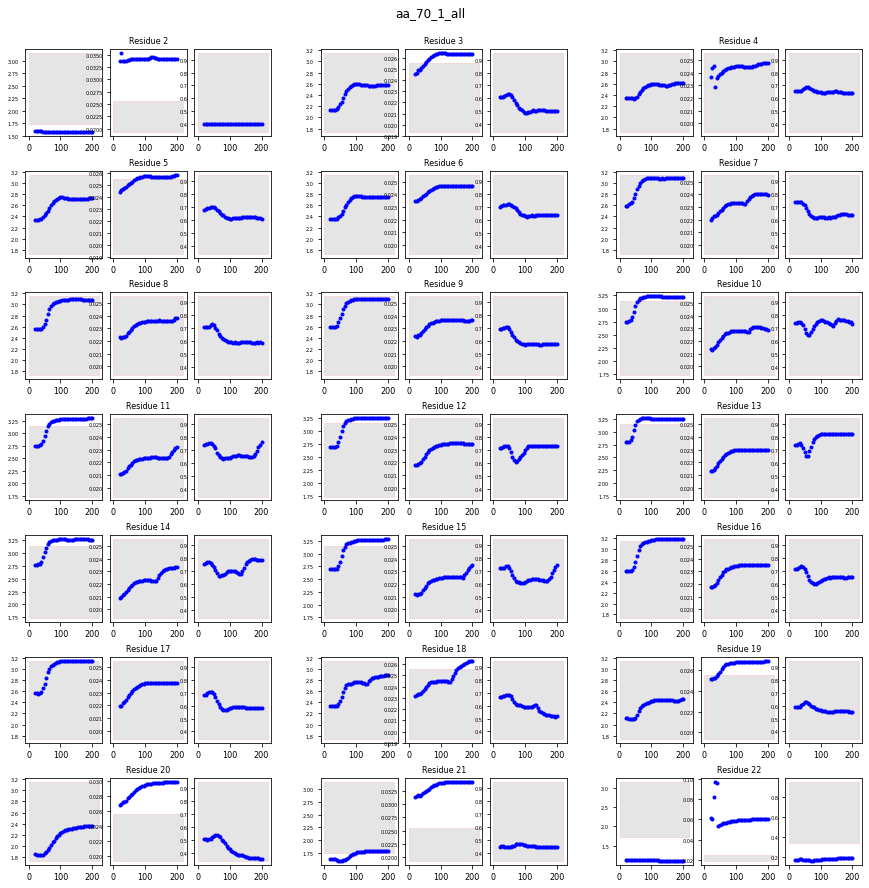

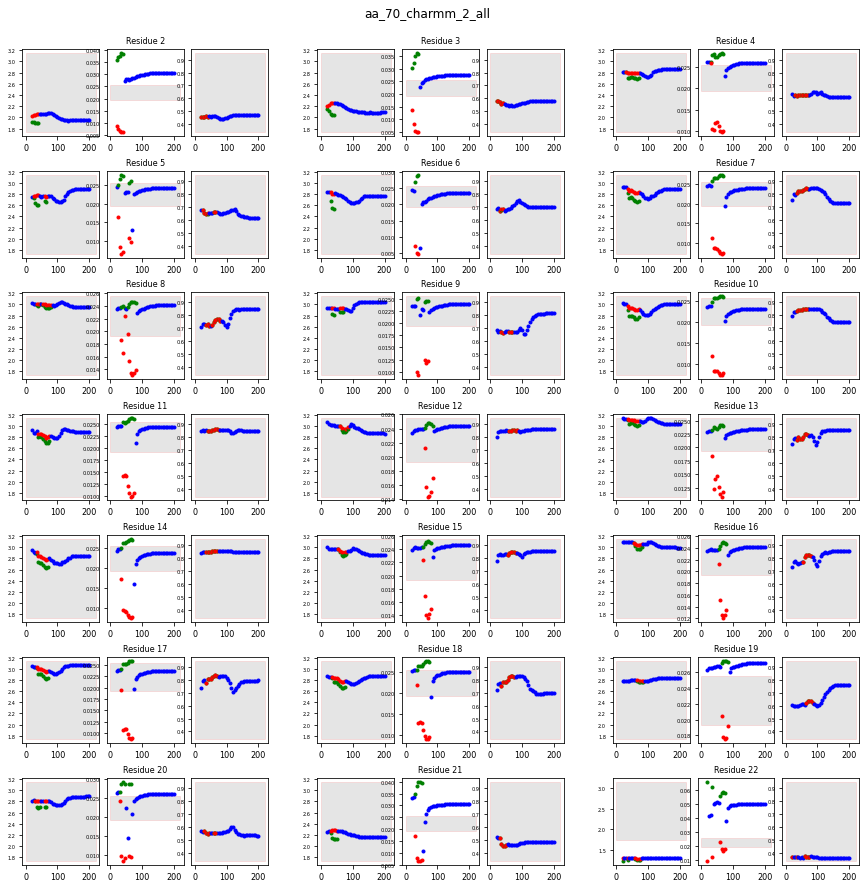

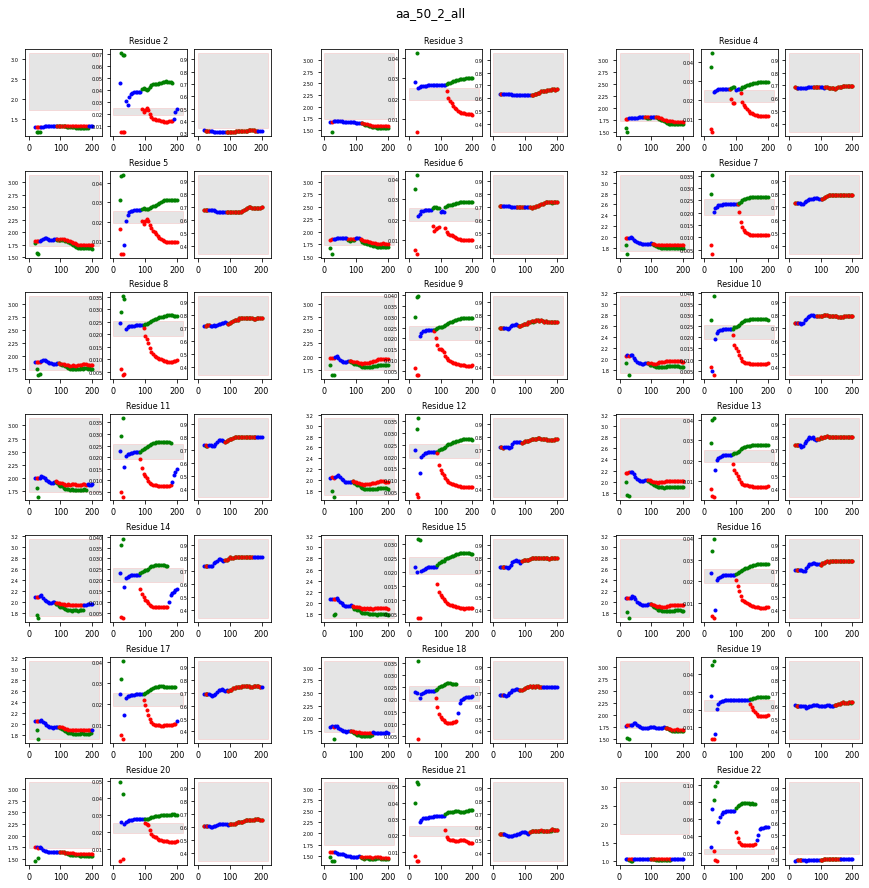

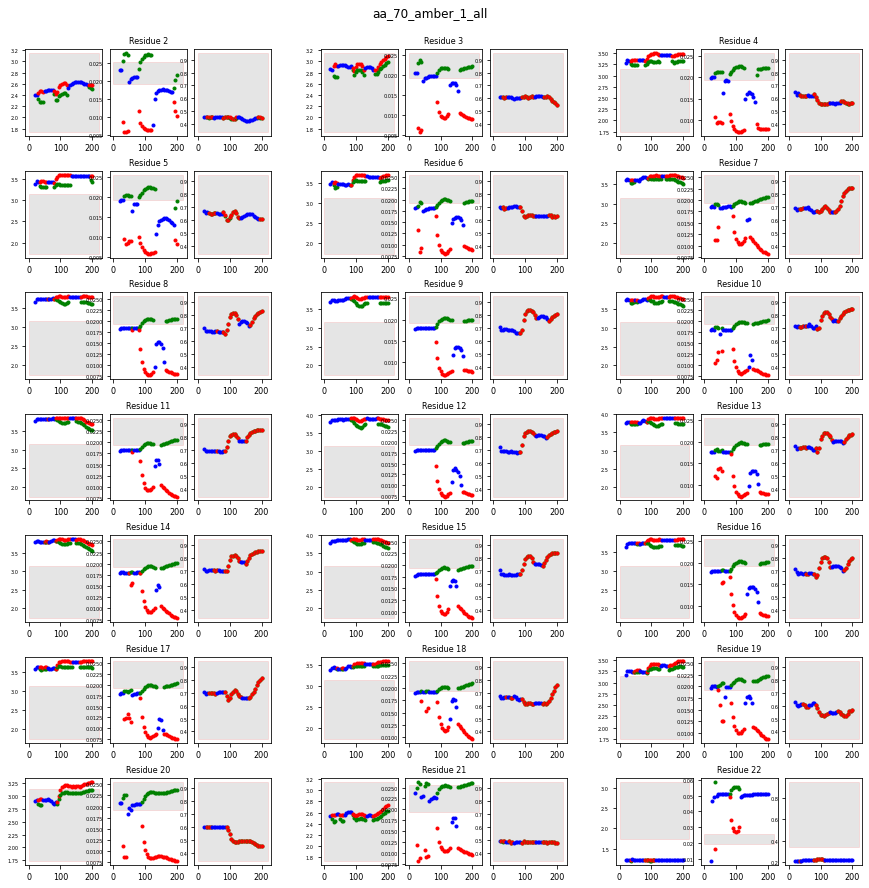

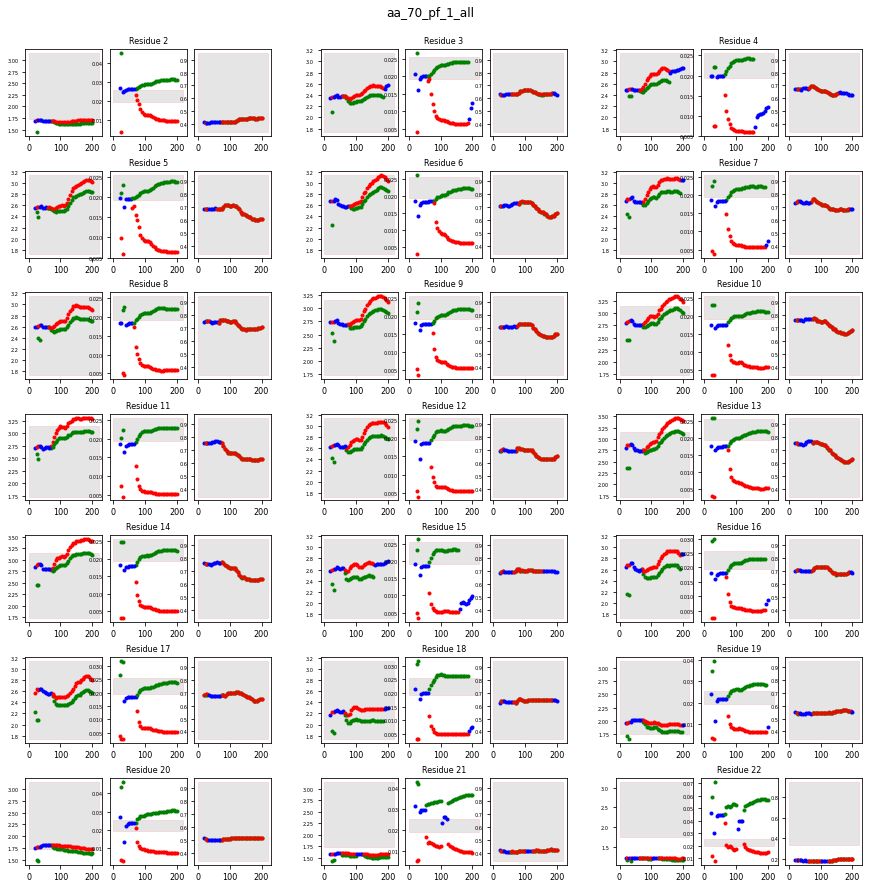

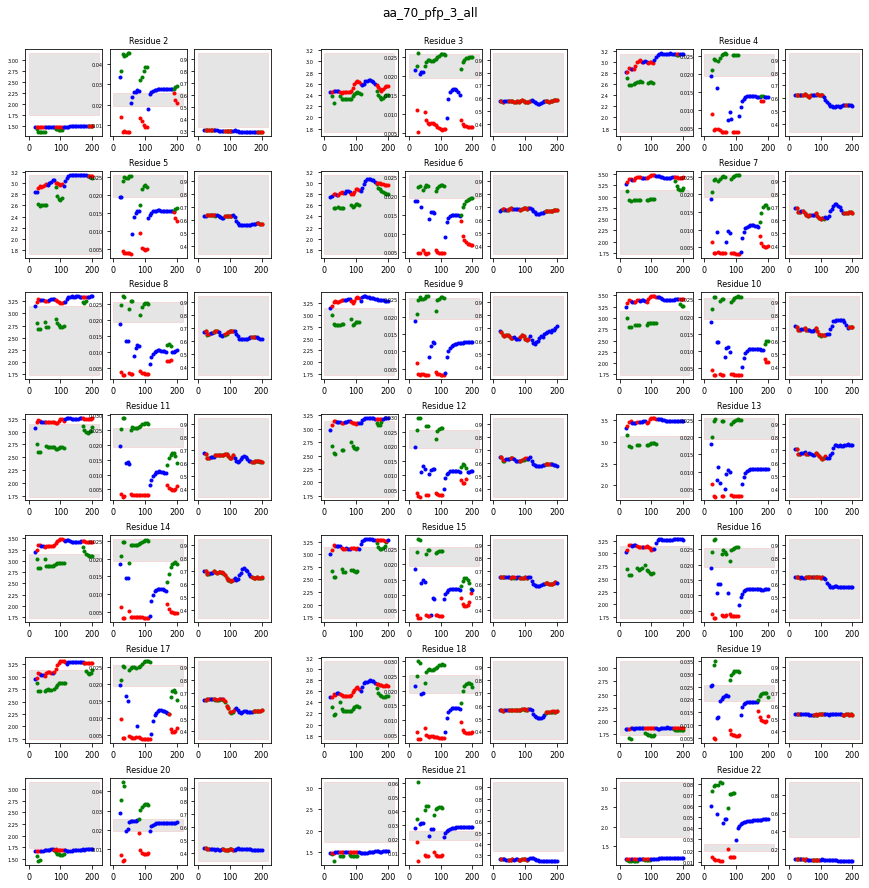

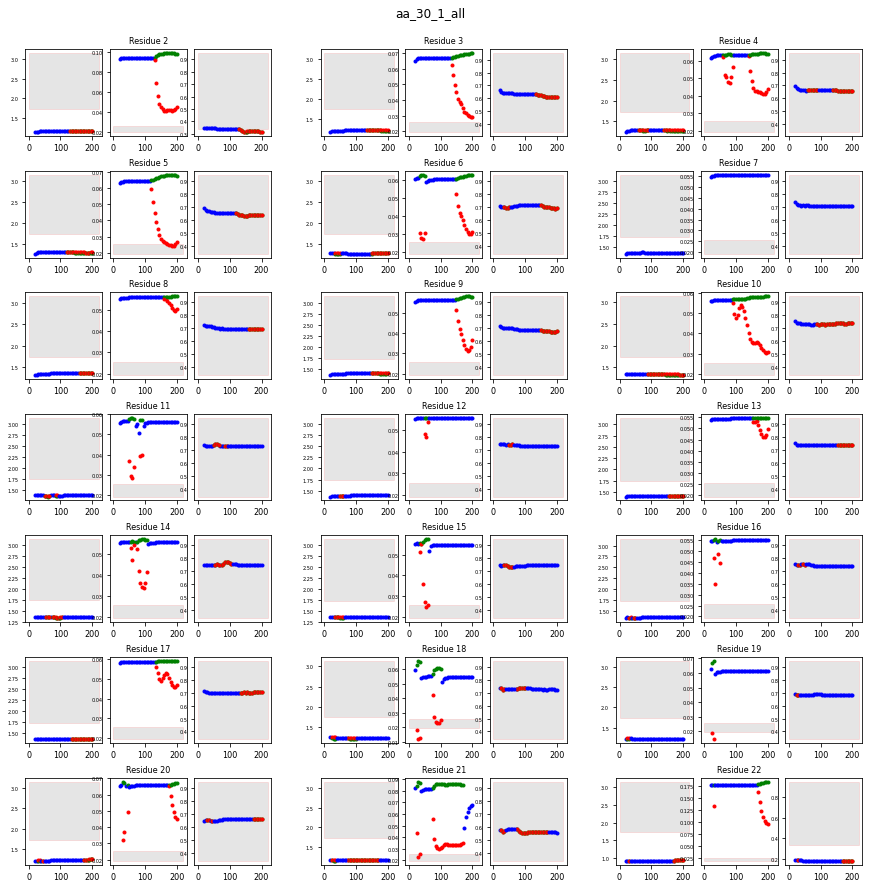

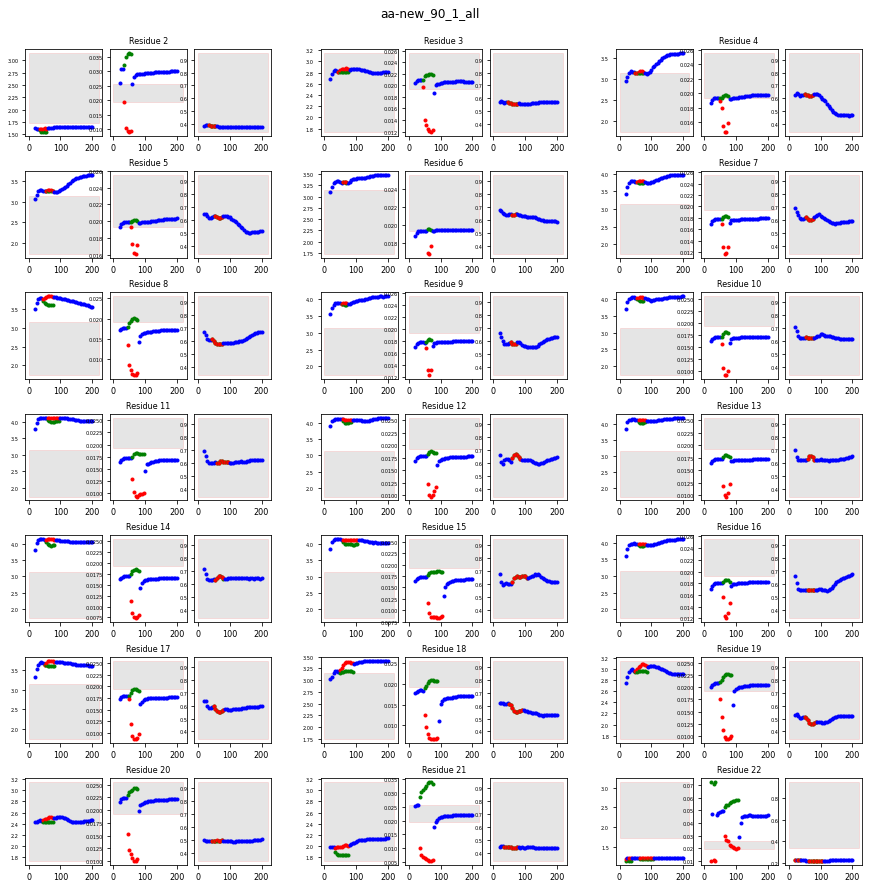

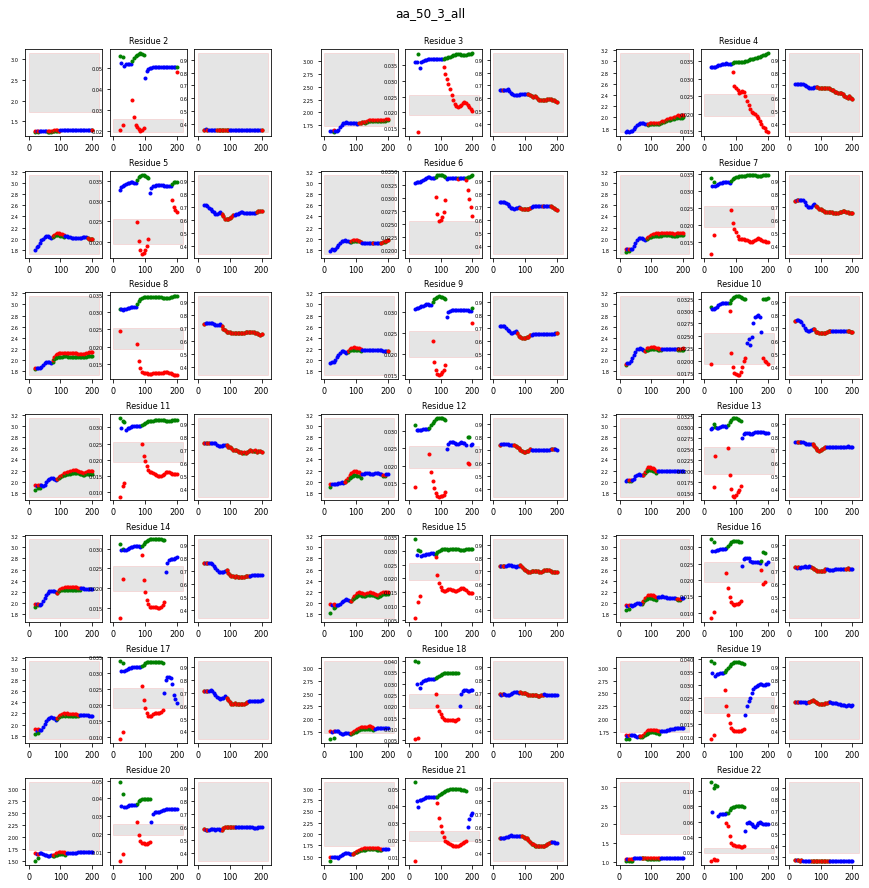

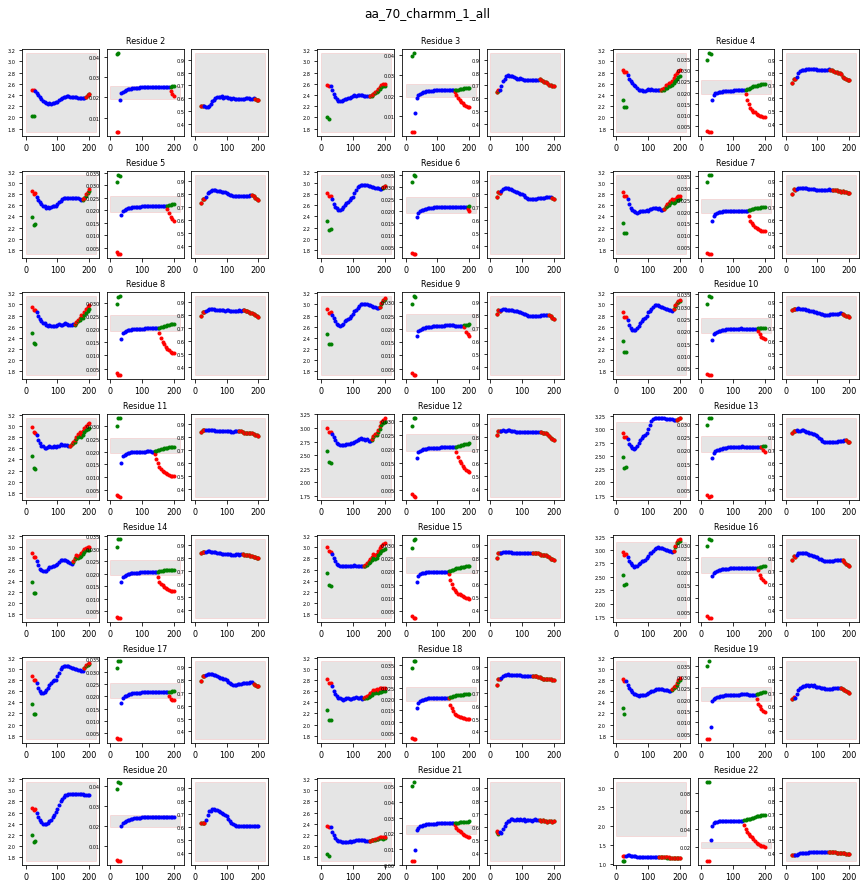

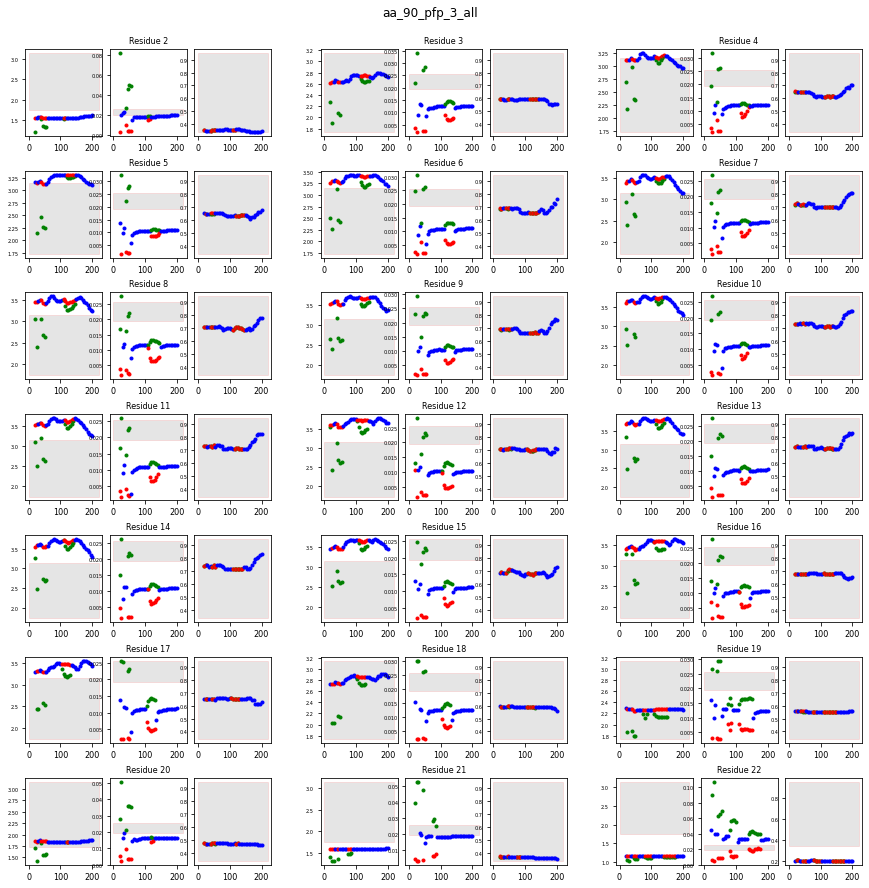

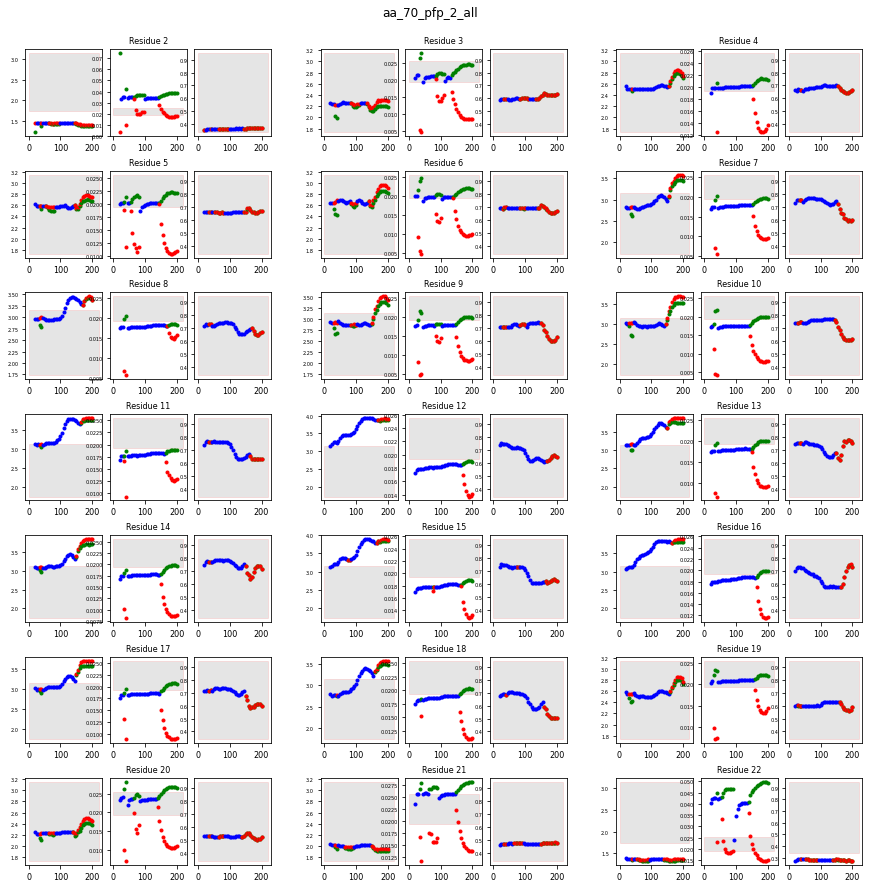

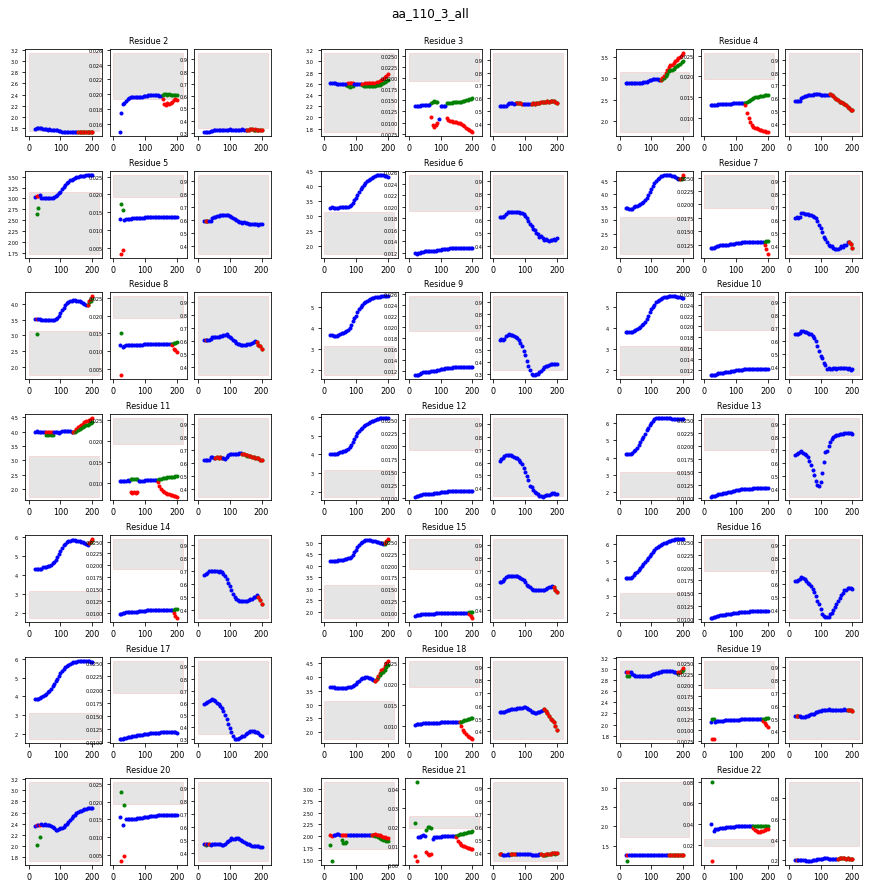

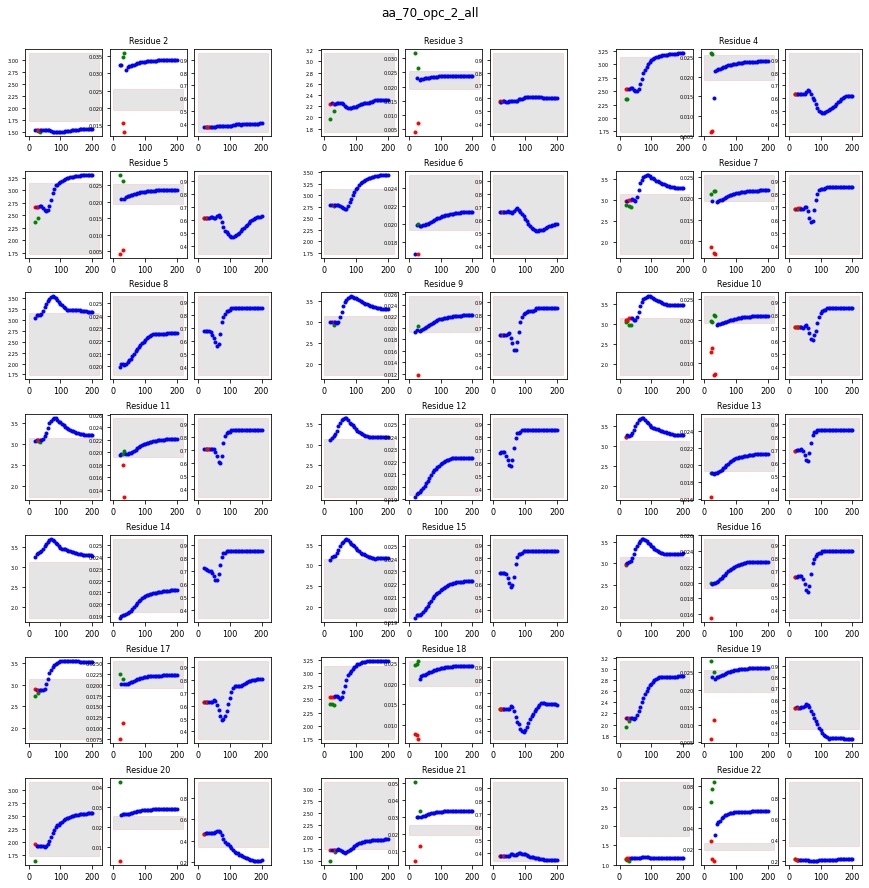

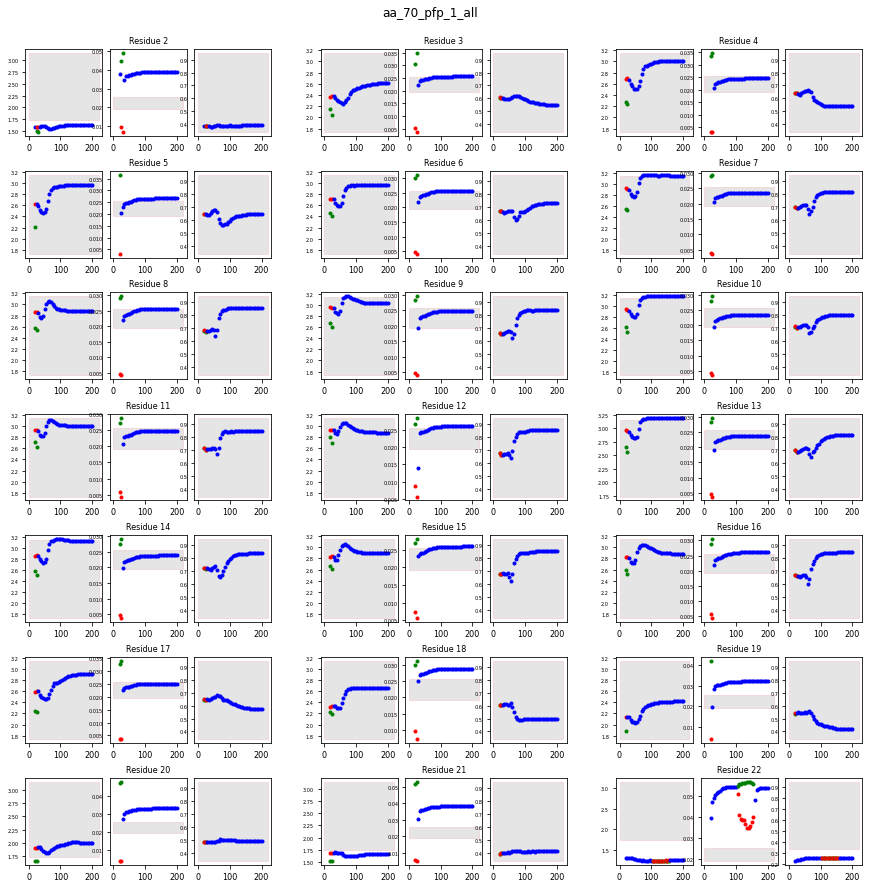

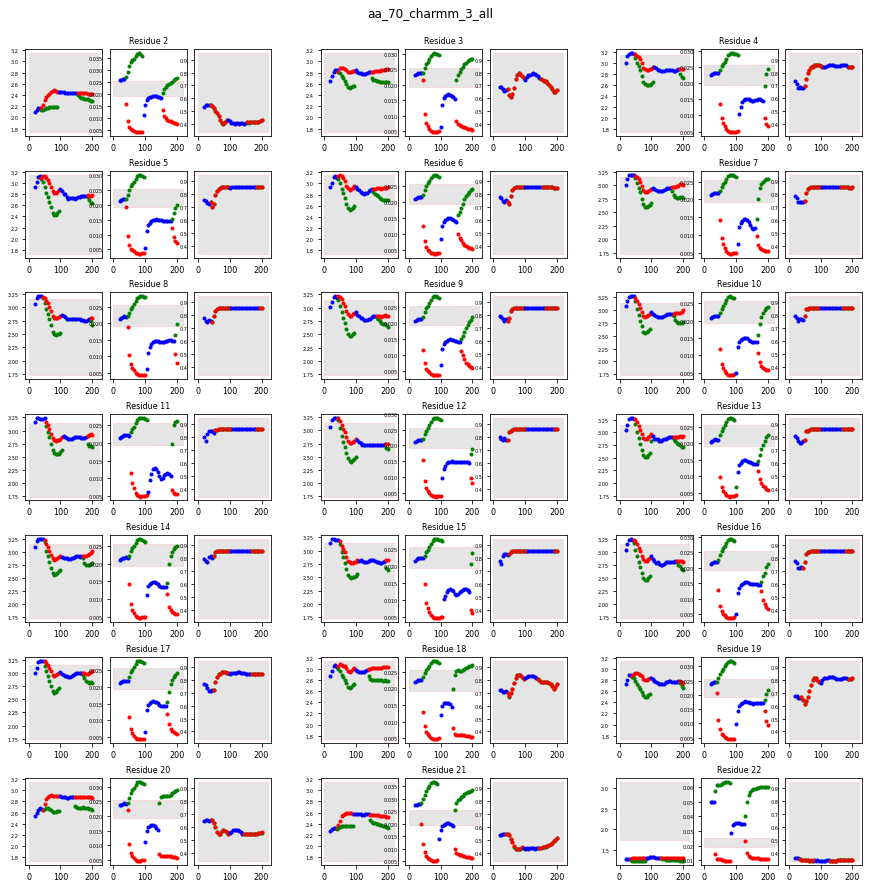

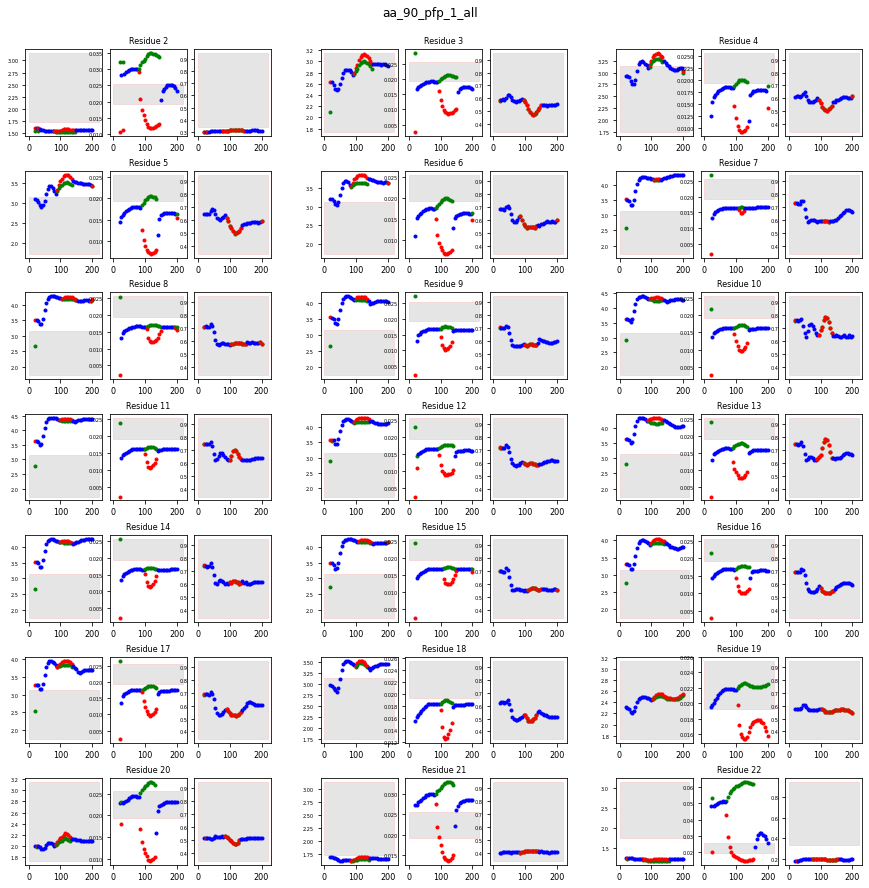

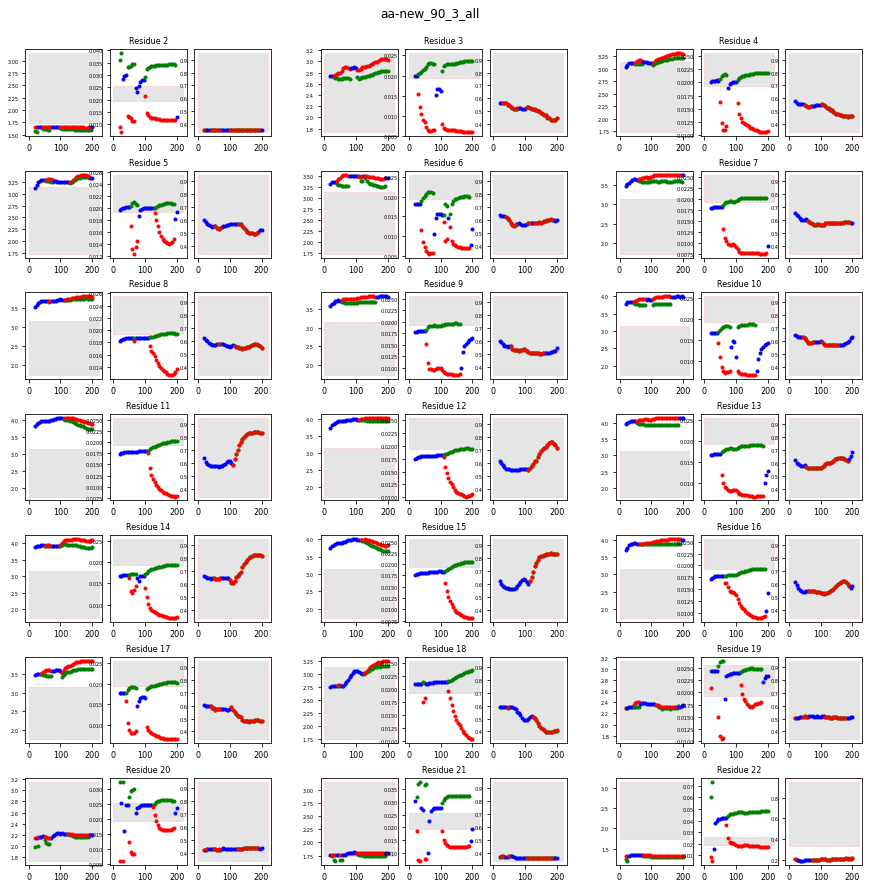

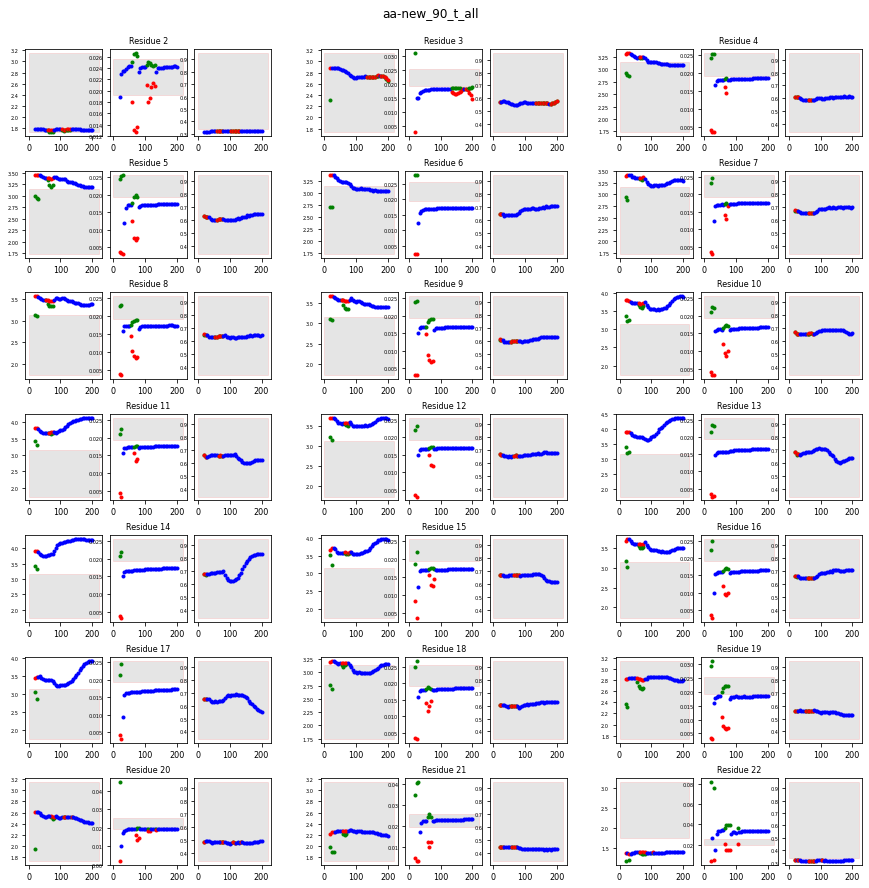

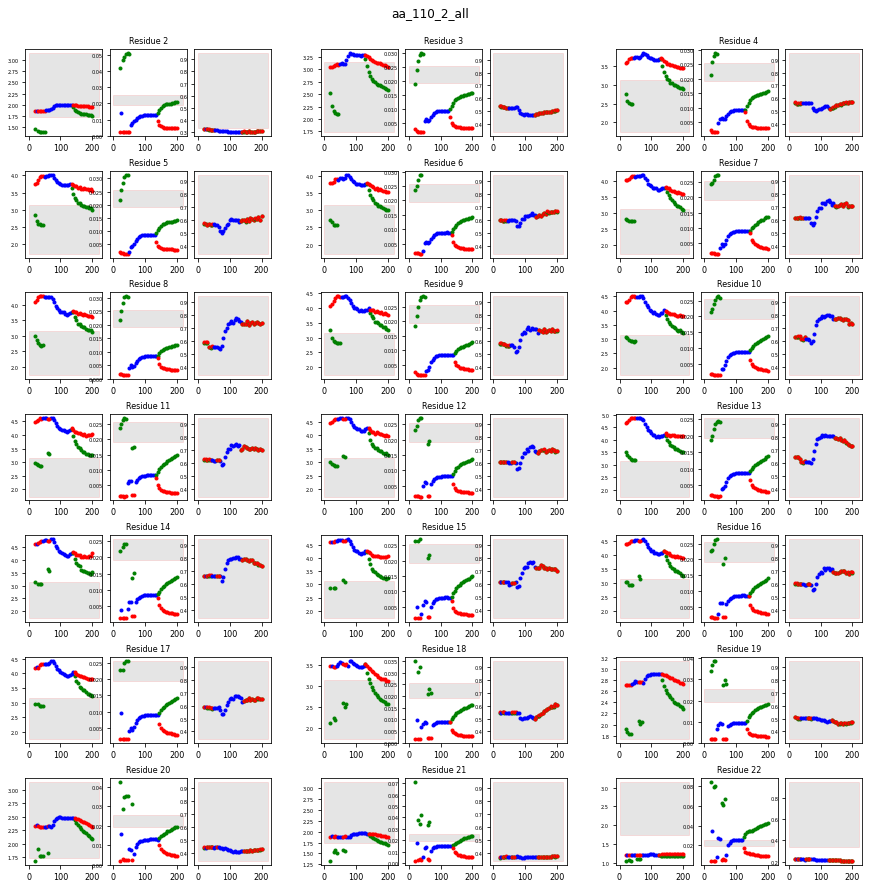

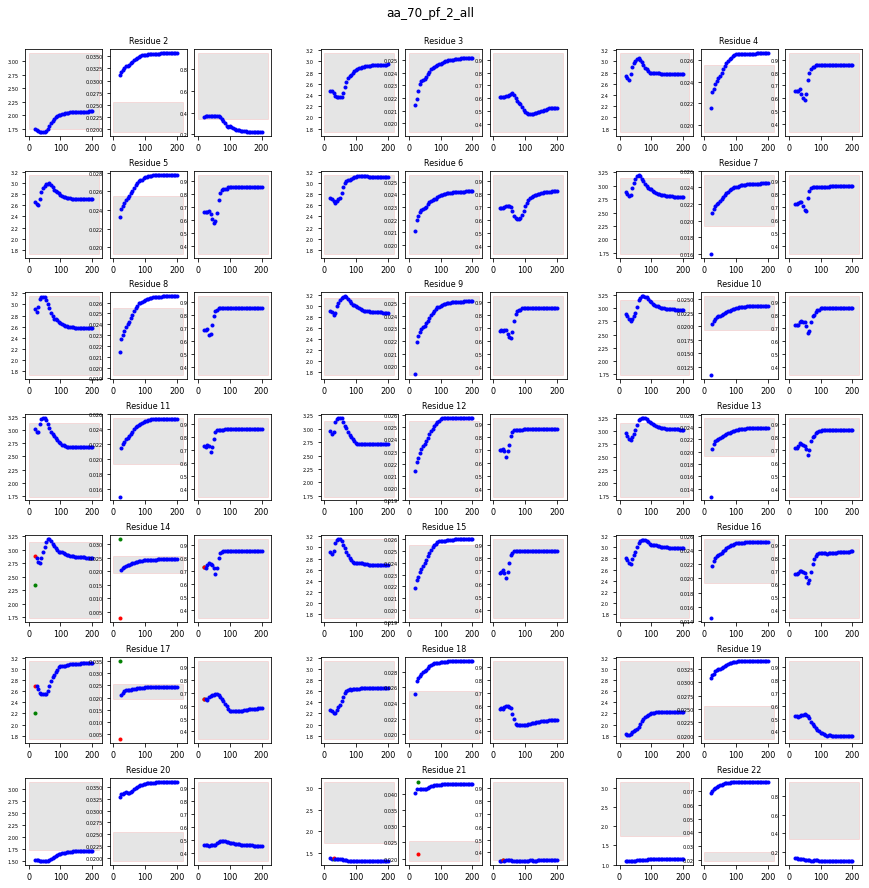

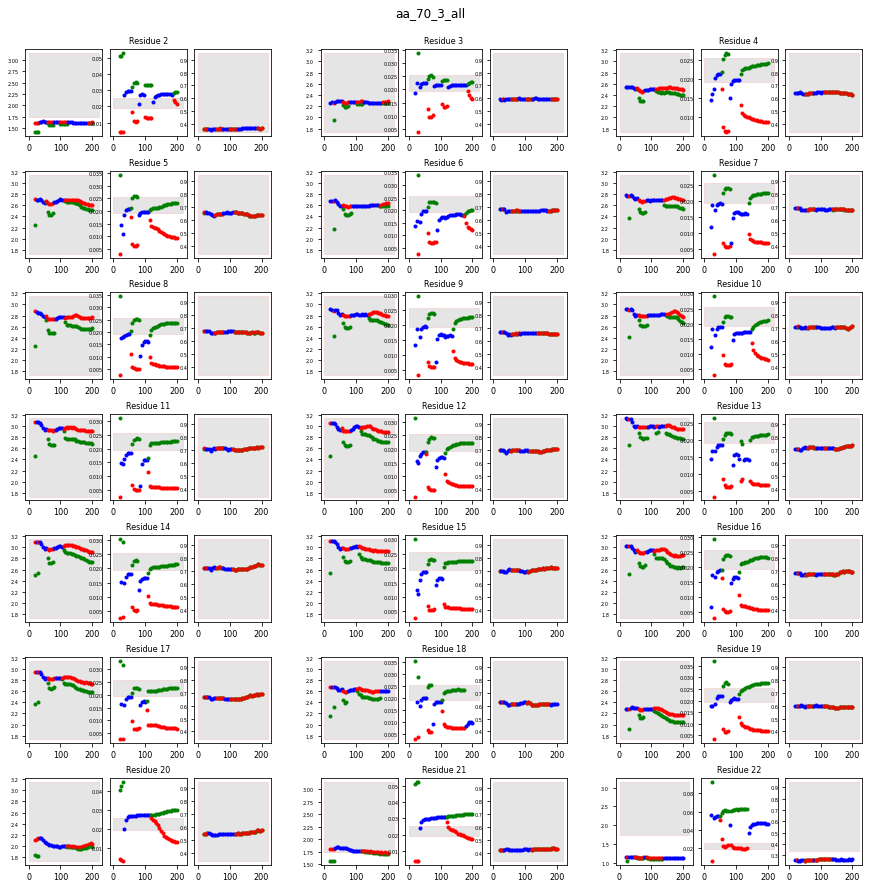

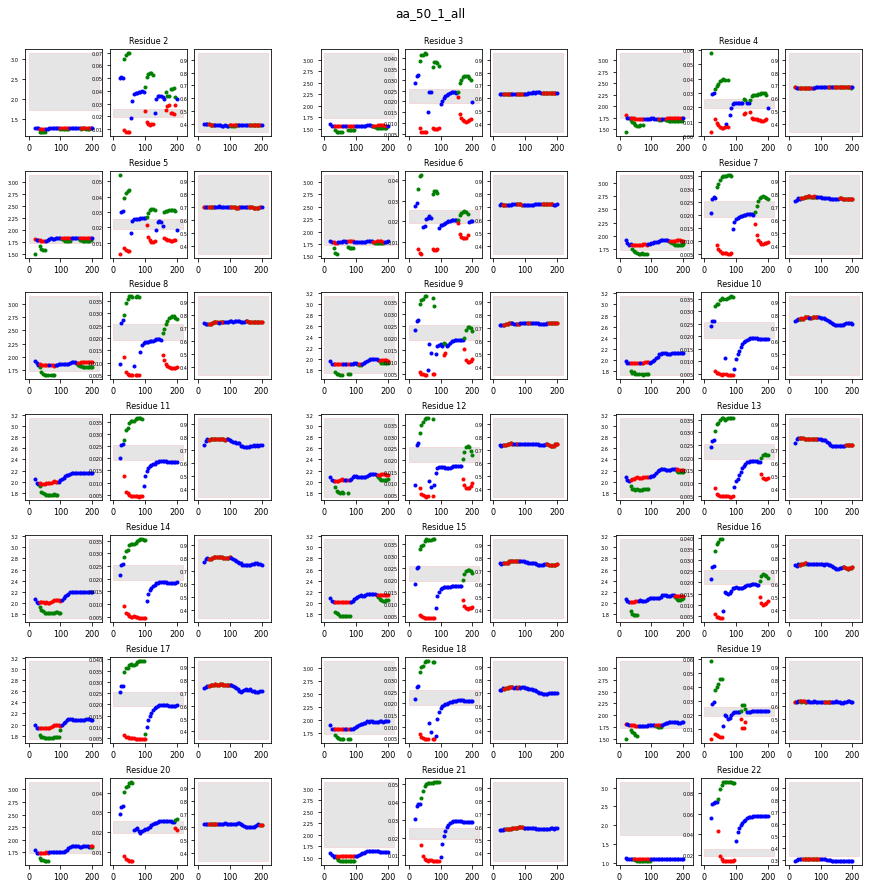

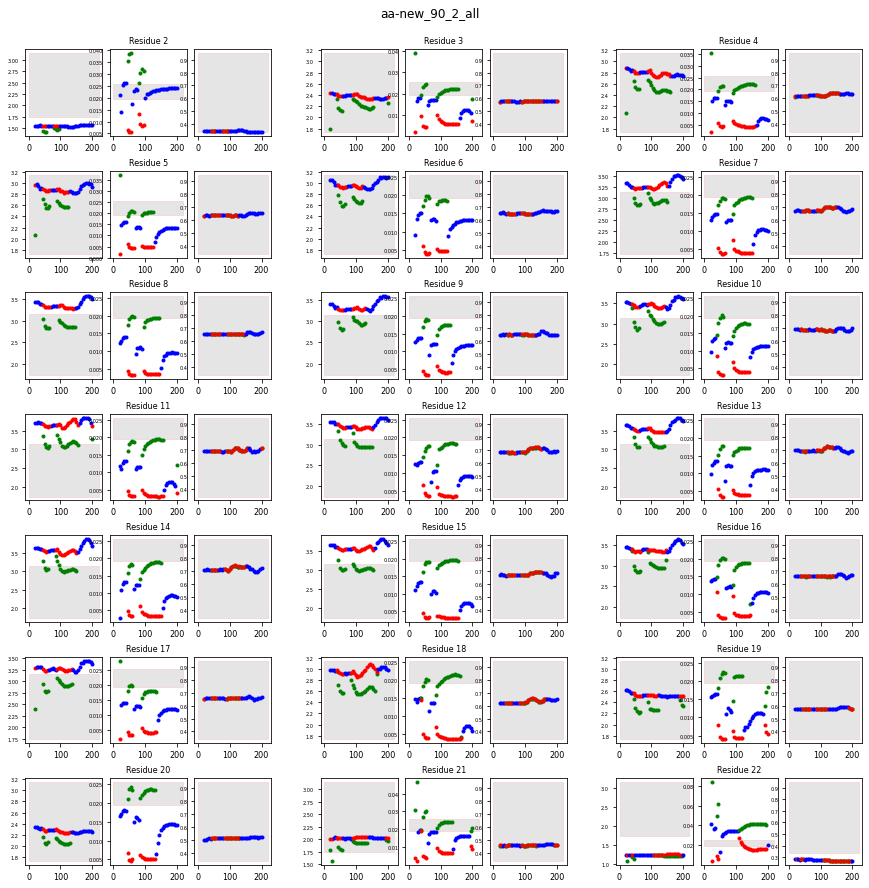

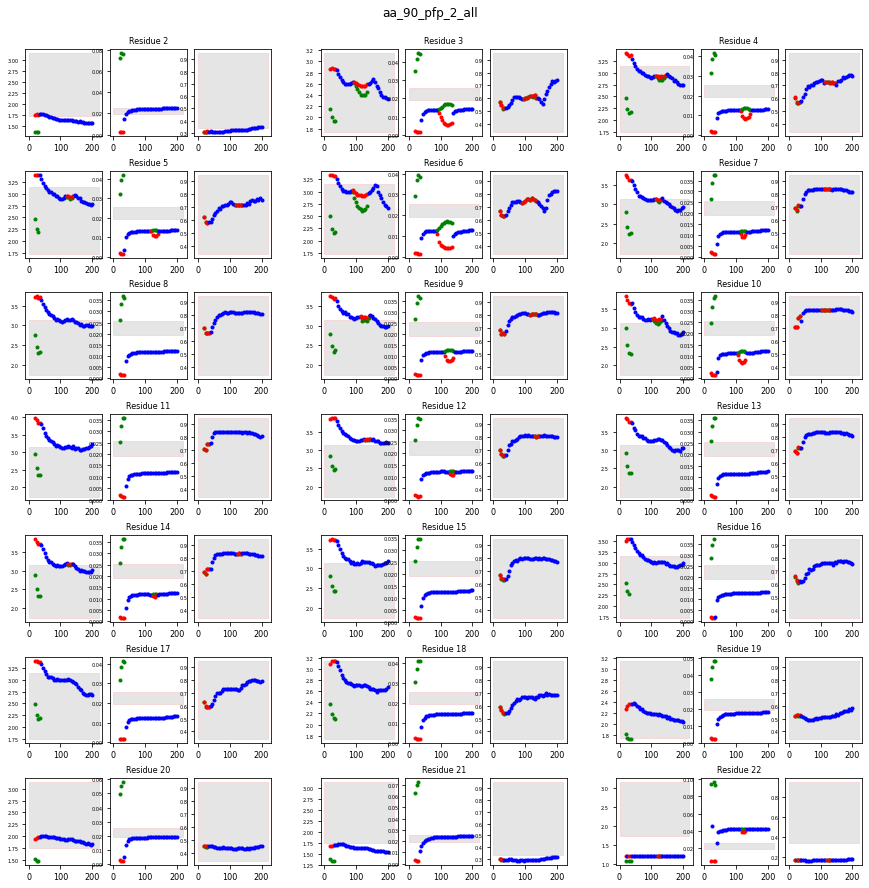

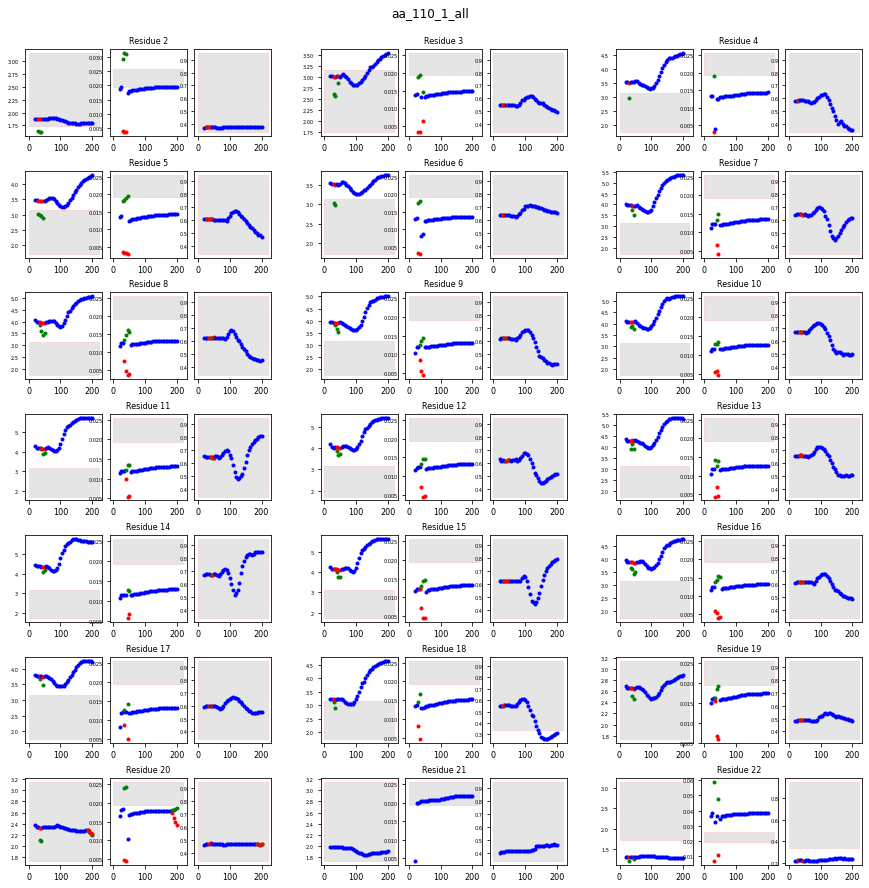

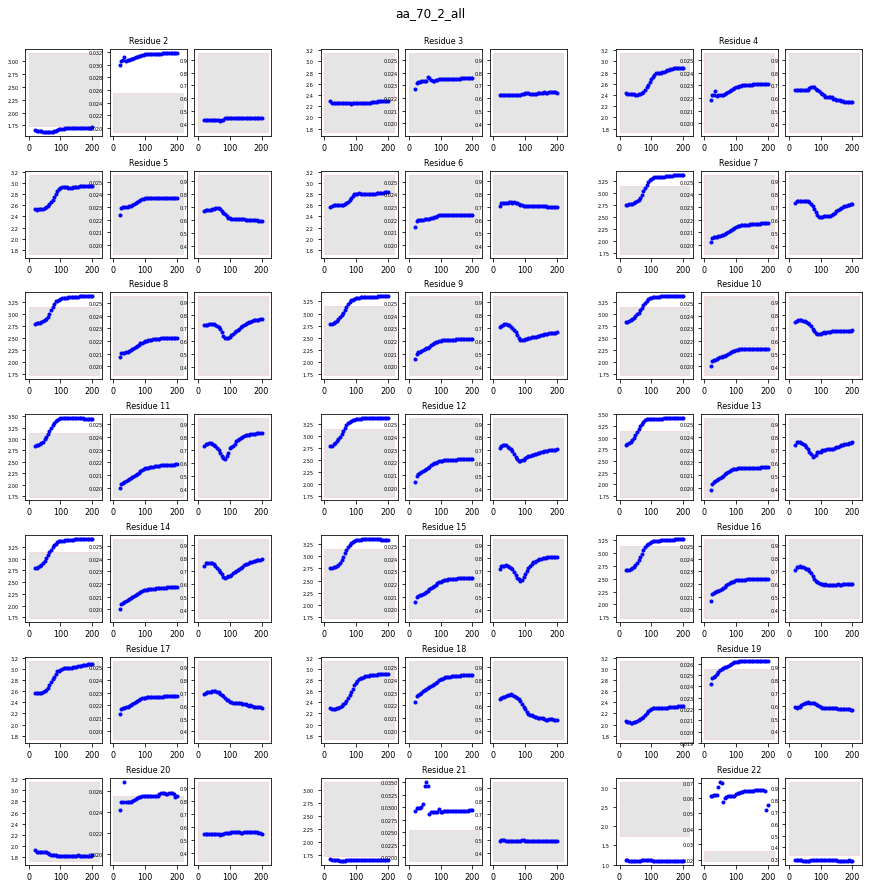

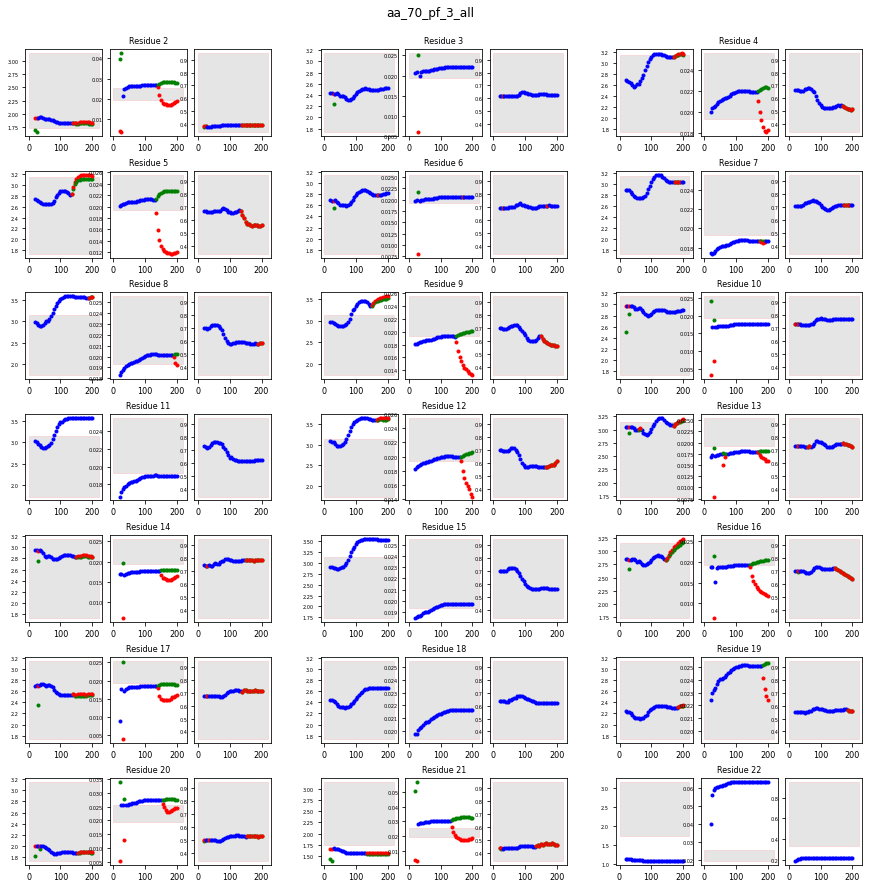

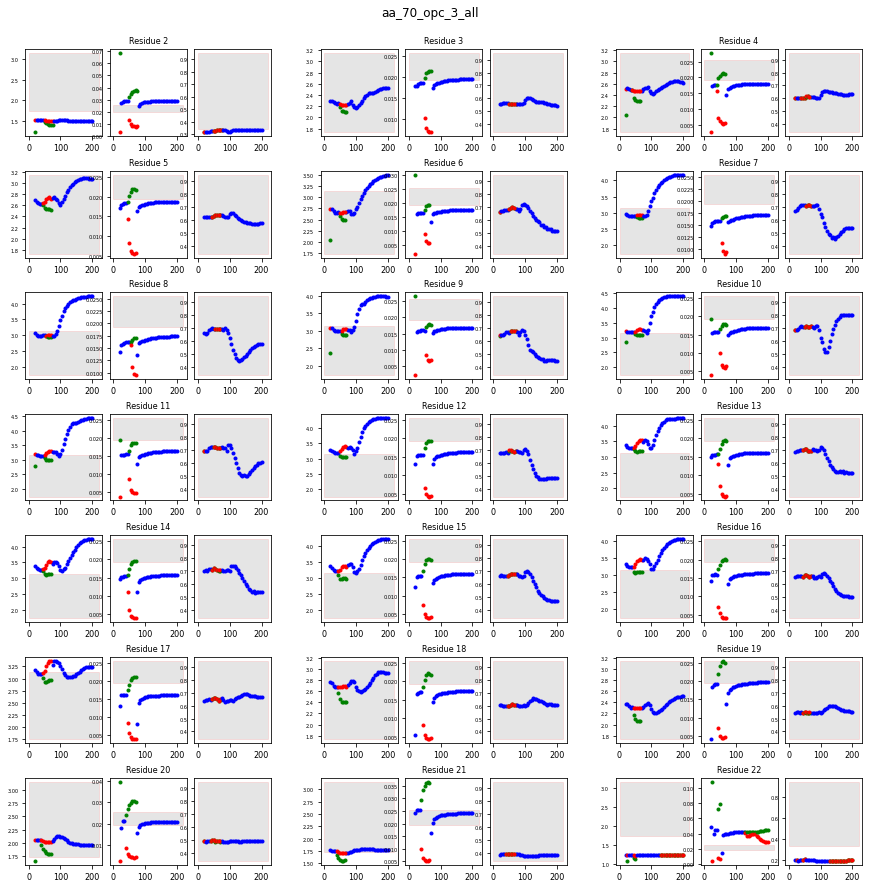

In [80]:
for system in timescales_yamls:
    plot_SRT_convergence_for_system(system)

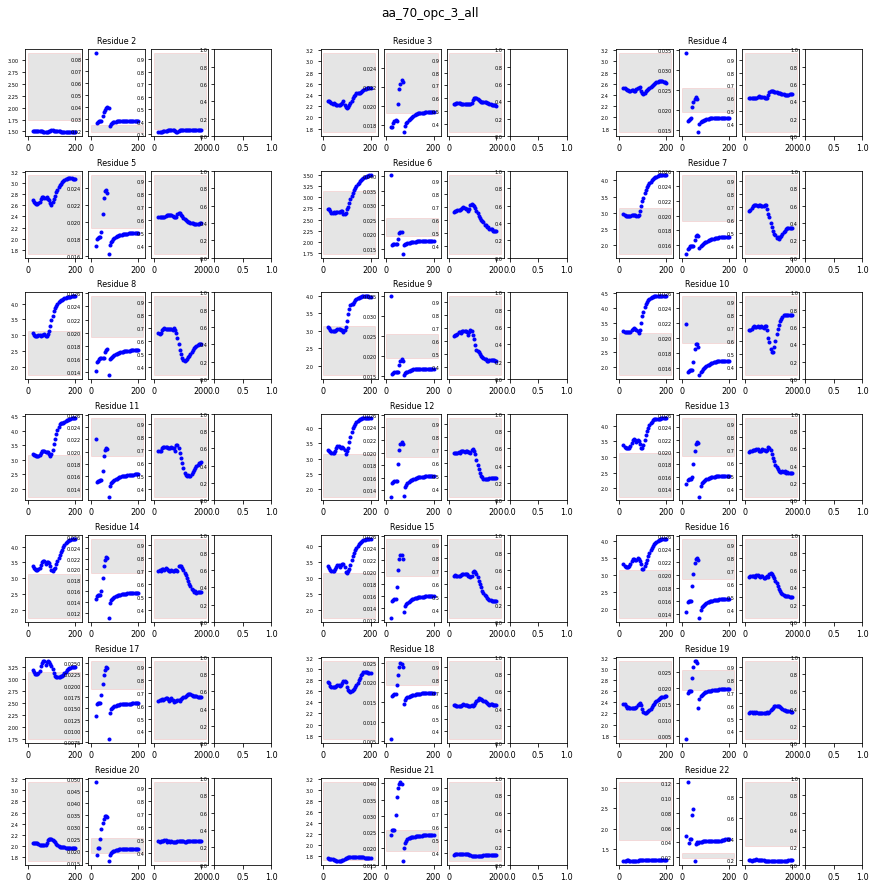

In [84]:
plot_SRT_convergence_for_system(system)